In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import tensorflow_hub as hub

In [0]:
mobile_net_url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

model=tf.keras.Sequential([
                           hub.KerasLayer(handle=mobile_net_url,input_shape=(224,224,3),trainable=False)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


In [0]:
import os
import pathlib
content_data_url='/content/sample_data'

cata_root_orig=tf.keras.utils.get_file('imagenetV2','https://s3-us-west-2.amazonaws.com/imagenetv2public/imagenetv2-topimages.tar.gz',
                                       cache_dir=content_data_url,extract=True)

data_root=pathlib.Path(content_data_url+'/datasets/imagenetv2-topimages')
print(data_root)

/content/sample_data/datasets/imagenetv2-topimages
<class 'pathlib.PosixPath'>


In [0]:
for index,item in enumerate(data_root.iterdir()):
  print(item)
  if index==9:
    break

/content/sample_data/datasets/imagenetv2-topimages/897
/content/sample_data/datasets/imagenetv2-topimages/322
/content/sample_data/datasets/imagenetv2-topimages/933
/content/sample_data/datasets/imagenetv2-topimages/320
/content/sample_data/datasets/imagenetv2-topimages/695
/content/sample_data/datasets/imagenetv2-topimages/532
/content/sample_data/datasets/imagenetv2-topimages/570
/content/sample_data/datasets/imagenetv2-topimages/305
/content/sample_data/datasets/imagenetv2-topimages/762
/content/sample_data/datasets/imagenetv2-topimages/163


In [0]:
label_file=tf.keras.utils.get_file('label','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
label_text=None

with open(label_file, 'r') as f:
  label_text=f.read().split('\n')[:-1]

print(len(label_text))
print(label_text[:10])
print(label_text[-10:])

1001
['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen']
['buckeye', 'coral fungus', 'agaric', 'gyromitra', 'stinkhorn', 'earthstar', 'hen-of-the-woods', 'bolete', 'ear', 'toilet tissue']


10000


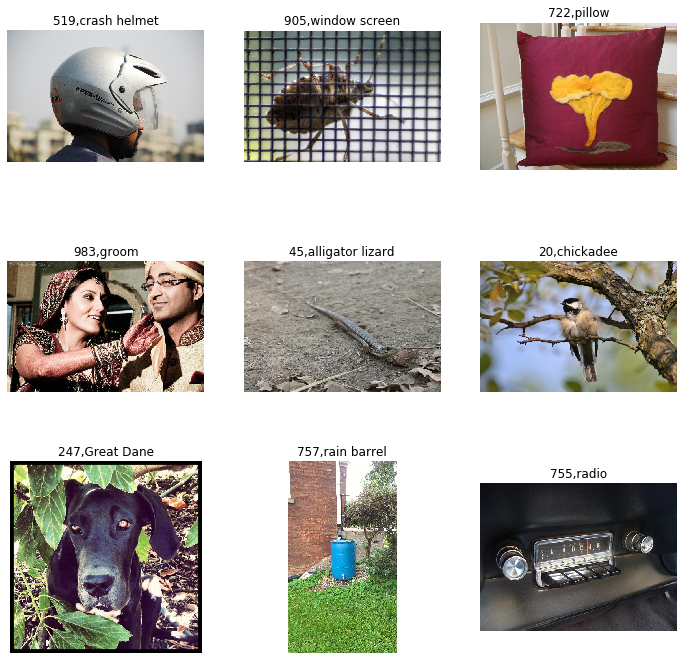

In [0]:
import PIL.Image as Image
import matplotlib.pyplot as plt
import random

random.seed(42)

all_image_paths=list(data_root.glob('*/*'))
all_image_paths=[str(path) for path in all_image_paths]

random.shuffle(all_image_paths)

image_count=len(all_image_paths)
print(image_count)


plt.figure(figsize=(12,12))
for c in range(9):
  image_path=random.choice(all_image_paths)
  plt.subplot(3,3,c+1)
  plt.imshow(plt.imread(image_path))
  idx=int(image_path.split('/')[-2])+1

  plt.title(str(idx)+','+label_text[idx])

  plt.axis('off')

plt.show()

In [0]:
import cv2
import numpy as np

top_1=0
top_5=0

for image_path in all_image_paths:
  img=cv2.imread(image_path)
  img=cv2.resize(img,dsize=(224,224))
  img=img/255

  img=np.expand_dims(img,axis=0)
  top_5_predict=model.predict(img)[0].argsort()[::-1][:5] # 오름차순으로 정렬하고 그 인덱스 가져옴, 역으로 가져옴, top 5개

  idx=int(image_path.split('/')[-2])+1
  if idx in top_5_predict:
    top_5+=1
    if top_5_predict[0]==idx:
      top_1+=1

print('top-5 correctness :',top_5/len(all_image_paths))
print('top-1 correctness :',top_1/len(all_image_paths))

top-5 correctness : 0.8384
top-1 correctness : 0.5945
